In [1]:
import sys
sys.path.append("..")
from model import experimental_model, experimental2d_model, grapher
from data import loader, data_generation
from helpers import helpers, plotter
from keras.callbacks import ModelCheckpoint
from inference import infer
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf; import keras

Using TensorFlow backend.


In [4]:
# options: rbf, periodic
print('Kernel? rbf/rbf_noise/periodic/rbf_const_2D/rbf_rbf_2D')
kernel = input()
d = True if kernel.split('_')[-1] == '2D' else False
save_dir = '/Users/omernivron/Downloads/GPT_' + kernel

Kernel? rbf/rbf_noise/periodic/rbf_const_2D/rbf_rbf_2D
periodic


In [5]:
data = loader.load_data(kernel, size = 1, rewrite = 'False', d = d)

['pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy']


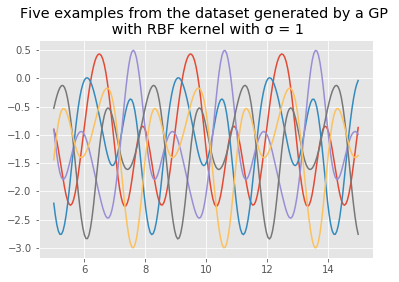

In [6]:
if d:
    plotter.plot_2d_examples(data[1], data[-3], data[-1])
else:
    plotter.plot_examples(data[0], data[4])

In [74]:
run = 1
name_comp = 'run_' + str(run) 
folder = save_dir + '/ckpt/check_' + name_comp; 

In [75]:
train_step, test_step, loss_object, train_loss, test_loss, m_tr, m_te = grapher.build_graph()

In [76]:
folder

'/Users/omernivron/Downloads/GPT_rbf_noise/ckpt/check_run_1'

In [77]:
ℯ = 512; l = [256, 256, 64, 32];  heads = 32; context = 50; order = True; consec = False
ℯ, l1, _, l2, l3 = helpers.load_spec(folder, ℯ, l, context_p = context, d = d); 

In [81]:
if d:
    decoder = experimental2d_model.Decoder(ℯ, l1, l2, l3, num_heads = heads)
else:
    decoder = experimental_model.Decoder(ℯ, l1, l2, l3, num_heads = heads, input_vocab_size = 200); 

In [82]:
optimizer_c = tf.keras.optimizers.Adam(3e-4)
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer = optimizer_c, net = decoder)
manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)


If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

sample # 0, r squared: -1.6982560272097644
sample # 1, r squared: -3.3807374884408166
sample # 2, r squared: -2.6218150213818854
sample # 3, r squared: -0.14194415602911037
sample # 4, r squared: -0.900103278422151
sample # 5, r squared: -0.9706155975395756
sample # 6, r squared: -2.81535862625028
sample # 7, r squared: -3.9452011422123237
sample # 8, r squared: -9.247736609361102
sample # 9, r squared: -12.398112455223988
sample # 10, r squared: -1.0741162718113624
sample # 11, r squared: -2.5536268178

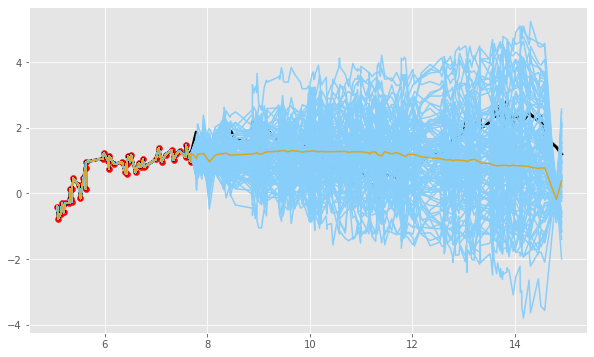

In [83]:
if d:
    idx = int(43)
    plotter.infer_plot2D(decoder, data[2][idx, :], data[6][idx, :], data[3][idx, :], data[0][idx, :], samples = 10, num_steps = 999, consec = consec, order = order)

else:  
    idx = int(1601)
    plotter.infer_plot(decoder, em = data[2][idx, :], x = data[1][idx, :], y = data[-1][idx, :], num_steps = 150, samples = 100, context_p = context, order = order, consec = consec)

rbf_noise
['pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy']

If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

sample # 0, r squared: 0.14035830892867107
sample # 1, r squared: -3.316620053331274
sample # 2, r squared: -1.677421607410289
sample # 3, r squared: -0.546851002850471
sample # 4, r squared: 0.12195156692795073
sample # 5, r squared: -0.3831791491791514
sample # 6, r squared: -1.6817624266653612
sample # 7, r squared: 0.708060155636897
sample # 8, r squared: -4.438483863857959
sample # 9, 


If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



InvalidArgumentError: In[0] mismatch In[1] shape: 329 vs. 330: [1,32,329,329] [1,32,330,16] 0 0 [Op:BatchMatMulV2]

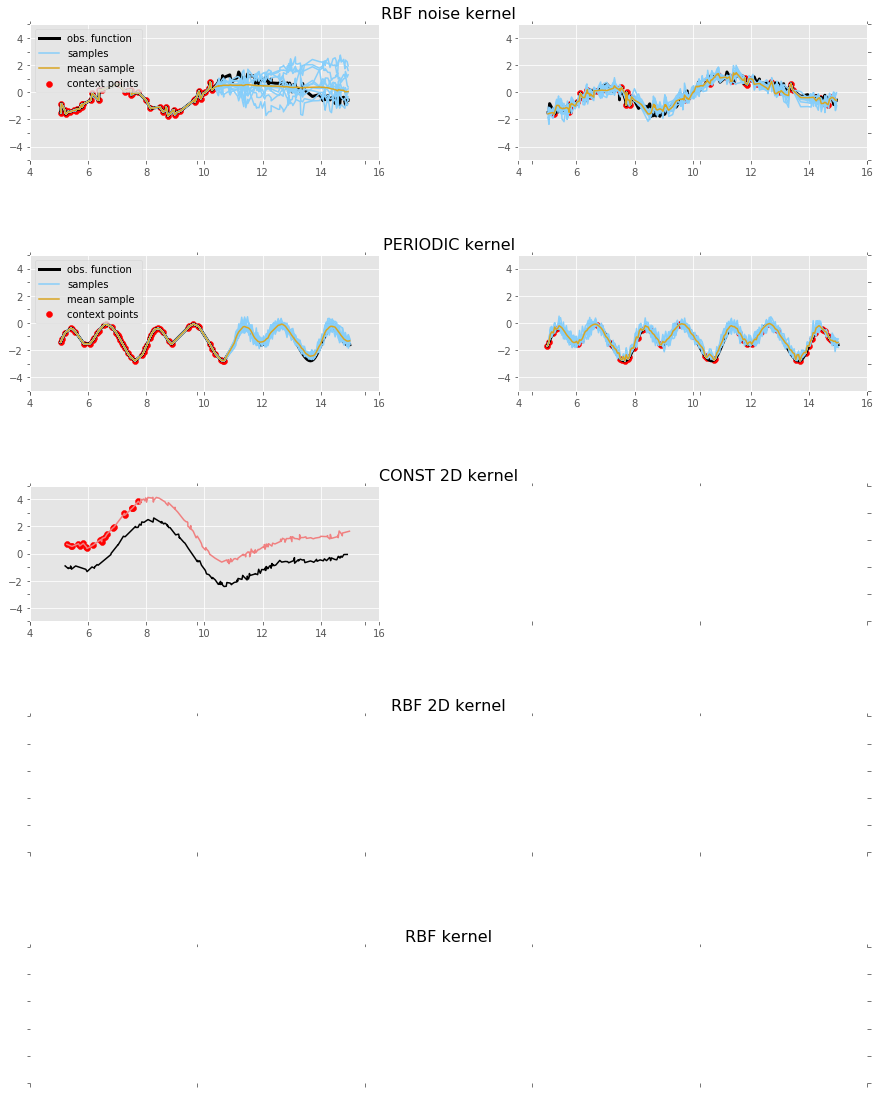

In [4]:
plotter.all_inference(consec = True)

['pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy']
RBF(length_scale=1)
RBF(length_scale=1) + WhiteKernel(noise_level=0.5)
RBF(length_scale=1.65) + WhiteKernel(noise_level=0.0552)
RBF(length_scale=1)
RBF(length_scale=1) + WhiteKernel(noise_level=0.5)
RBF(length_scale=0.916) + WhiteKernel(noise_level=0.0491)
['pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy']
ExpSineSquared(length_scale=1, periodicity=1)
ExpSineSquared(length_scale=1.08, periodicity=3.03)
ExpSineSquared(length_scale=1, periodicity=1)
ExpSineSquared(length_scale=1, periodicity=7.52)
['.DS_Store', 'pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy']
RBF(length_scale=1)
RBF(length_scale=1.04)
RBF(length_scale=1)
RBF(length_scale=1.04)


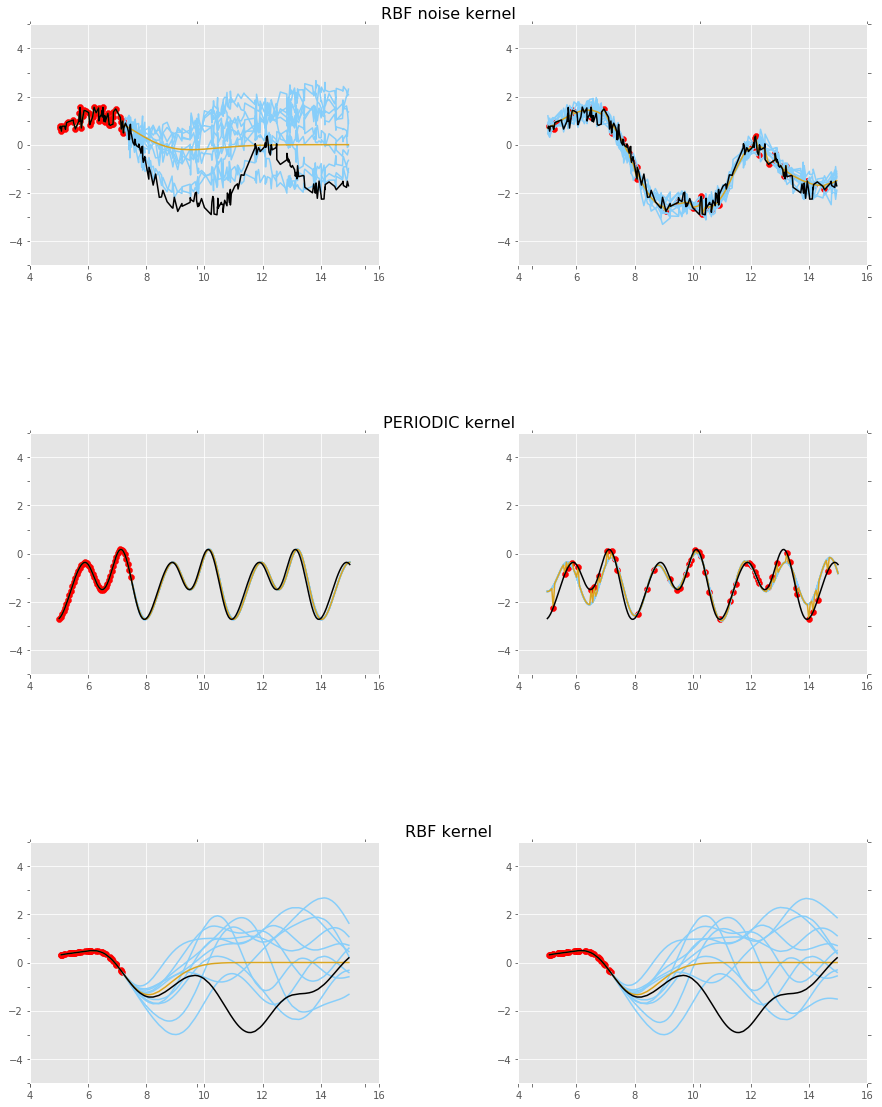

In [3]:
plotter.GP_infer1D()